
Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


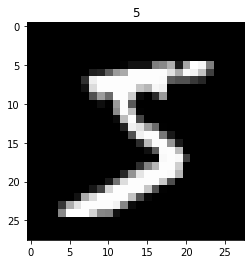

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.362766
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.920103
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.708902
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.541106
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.361911
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.195916
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.144615
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.965182
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.890896
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.963121

Test set: Average loss: 0.8401, Accuracy: 9034/10000 (90%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.890013
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.861605
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.882422
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.800629
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.674853
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.685821
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.676852
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.550655
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.521444
T

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1fr8ap24It4ev7Ll-6BRb5YmYVZOT9cT9
"""

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class Net_1(nn.Module):
    def __init__(self):
        super(Net_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.bn_conv2 = nn.BatchNorm2d(50)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.bn = nn.BatchNorm1d(500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.bn_conv2(self.conv2(x)))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.sigmoid(self.bn(self.fc1(x)))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500,10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2,2)
        self.log_softmax = nn.LogSoftmax(dim=1)
        self.sigmoid = nn.sigmoid()
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.sigmoid(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.sigmoid(x)
        x = self.maxpool(x)
        x = x.view(-1, 4*4*50)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.log_softmax(x)
        return x

class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        self.conv_S = nn.Sequential( 
            nn.Conv2d(
                in_channels = 1,
                out_channels = 20,
                kernel_size = 5,
                stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            
            nn.Conv2d(20, 50, 5, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_S = nn.Sequential(
            nn.Linear(4*4*50, 500),
            nn.ReLU(),
            nn.Linear(500, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_S(x)
        x = x.view(-1, 4*4*50)
        x = self.fc_S(x)
        return x

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

batch_size = 64
test_batch_size = 64
epochs = 10
lr = 0.001
momentum = 0.5
log_interval = 100

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True, **kwargs)

import numpy as np
import matplotlib.pyplot as plt

train_data = datasets.MNIST('../data', train=True, download=True)
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

model = Net_1().to(device)
loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)



In [ ]:
'''
class Net_1(nn.Module):
    def __init__(self):
        super(Net_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

'''

'\nclass Net_1(nn.Module):\n    def __init__(self):\n        super(Net_1, self).__init__()\n        self.conv1 = nn.Conv2d(1, 20, 5, 1)\n        self.conv2 = nn.Conv2d(20, 50, 5, 1)\n        self.fc1 = nn.Linear(4*4*50, 500)\n        self.fc2 = nn.Linear(500, 10)\n\n    def forward(self, x):\n        x = F.relu(self.conv1(x))\n        x = F.max_pool2d(x, 2, 2)\n        x = F.relu(self.conv2(x))\n        x = F.max_pool2d(x, 2, 2)\n        x = x.view(-1, 4*4*50)\n        x = F.sigmoid(self.fc1(x))\n        x = self.fc2(x)\n        return F.log_softmax(x, dim=1)\n\n'

In [ ]:
'''
class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linea
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2,2)
        self.log_softmax = nn.LogSoftmax(dim=1)
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.sigmoid(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.sigmoid(x)
        x = self.maxpool(x)
        x = x.view(-1, 4*4*50)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.log_softmax(x)
        return x

'''

'\nclass Net_2(nn.Module):\n    def __init__(self):\n        super(Net_2, self).__init__()\n        self.conv1 = nn.Conv2d(1, 20, 5, 1)\n        self.conv2 = nn.Conv2d(20, 50, 5, 1)\n        self.fc1 = nn.Linear(4*4*50, 500)\n        self.fc2 = nn.Linea\n        self.relu = nn.ReLU()\n        self.maxpool = nn.MaxPool2d(2,2)\n        self.log_softmax = nn.LogSoftmax(dim=1)\n        \n\n    def forward(self, x):\n        x = self.conv1(x)\n        x = self.sigmoid(x)\n        x = self.maxpool(x)\n        x = self.conv2(x)\n        x = self.sigmoid(x)\n        x = self.maxpool(x)\n        x = x.view(-1, 4*4*50)\n        x = self.fc1(x)\n        x = self.sigmoid(x)\n        x = self.fc2(x)\n        x = self.log_softmax(x)\n        return x\n\n'

In [ ]:
'''
class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        self.conv_S = nn.Sequential( 
            nn.Conv2d(
                in_channels = 1,
                out_channels = 20,
                kernel_size = 5,
                stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            
            nn.Conv2d(20, 50, 5, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_S = nn.Sequential(
            nn.Linear(4*4*50, 500),
            nn.ReLU(),
            nn.Linear(500, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_S(x)
        x = x.view(-1, 4*4*50)
        x = self.fc_S(x)
        return x

'''



'\nclass Net_3(nn.Module):\n    def __init__(self):\n        super(Net_3, self).__init__()\n        self.conv_S = nn.Sequential( \n            nn.Conv2d(\n                in_channels = 1,\n                out_channels = 20,\n                kernel_size = 5,\n                stride = 1),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size = 2),\n            \n            nn.Conv2d(20, 50, 5, 1),\n            nn.ReLU(),\n            nn.MaxPool2d(2)\n        )\n        self.fc_S = nn.Sequential(\n            nn.Linear(4*4*50, 500),\n            nn.ReLU(),\n            nn.Linear(500, 10),\n            nn.LogSoftmax(dim=1)\n        )\n\n    def forward(self, x):\n        x = self.conv_S(x)\n        x = x.view(-1, 4*4*50)\n        x = self.fc_S(x)\n        return x\n\n'

In [ ]:
class BasicConv2d(nn.Module):
    def __init__(self,in_channels,out_channels,**kwargs):
        super().__init__()
        self.conv=nn.Conv2d(in_channels,out_channels,bias=False,**kwargs)
        self.bn=nn.BatchNorm2d(out_channels,eps=0.001)
    def forward(self,x):
        x=self.conv(x)
        x=self.bn(x)
        return F.relu(x,inplace=True)
    

class InceptionModule(nn.Module):
    def __init__(self,in_channels,conv1x1,reduce3x3,conv3x3,reduce5x5,conv5x5,pool_features):
        super().__init__()
        self.branch1x1=BasicConv2d(in_channels,conv1x1,kernel_size=1,stride=1,padding=0)
        
        self.branch3x3_1=BasicConv2d(in_channels,reduce3x3,kernel_size=1,stride=1,padding=0)
        self.branch3x3_2=BasicConv2d(reduce3x3,conv3x3,kernel_size=3,padding=1,stride=1)
        
        self.branch5x5_1=BasicConv2d(in_channels,reduce5x5,kernel_size=1,stride=1,padding=0)
        self.branch5x5_2=BasicConv2d(reduce5x5,conv5x5,kernel_size=5,stride=1,padding=2)
       
        self.branch_pool=BasicConv2d(in_channels,pool_features,kernel_size=1,stride=1,padding=0)
    def forward(self,x):
        branch1x1=self.branch1x1(x)
        
        branch3x3_a=self.branch3x3_1(x)
        branch3x3_b=self.branch3x3_2(branch3x3_a)
        
        branch5x5_a=self.branch5x5_1(x)
        branch5x5_b=self.branch5x5_2(branch5x5_a)

     
        branch_pool=F.max_pool2d(x,kernel_size=3,stride=1,padding=1)
        branch_pool=self.branch_pool(branch_pool)
        
        outputs=[branch1x1,branch3x3_b,branch5x5_b,branch_pool]
        return torch.cat(outputs,1)
   
   

class InceptionAux(nn.Module):
    def __init__(self,in_channels,out_channels,out,num_classes):
        super().__init()
        self.conv0=BasicConv2d(in_channels,out_channels,kernel_size=1,stride=1)
        self.conv1.stddev=0.01
        self.fc1=nn.Linear(out_channels,out)
        self.fc1.stddev=0.001
        self.fc2=nn.Linear(out,num_classes)
        self.fc2.stddev=0.001
        
    def forward(self,x):
        x=F.avg_pool2d(x,kernel_size=5,stride=3)
        x=self.conv0(x)
        x=x.view(x.size(0),-1) 
        x=self.fc1(x)
        x=self.fc2(x)
        return x
    

class Inception_v1_mnist(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        num_class=num_classes

        self.Conv2d1=BasicConv2d(1,8,kernel_size=5,stride=1,padding=2)
        self.Conv2d2=BasicConv2d(8,32,kernel_size=3,stride=1,padding=1)

        self.Mixed_3a=InceptionModule(32,16,24,32,4,8,pool_features=8) 
        self.Mixed_3b=InceptionModule(64,32,32,48,8,24,pool_features=16) 

        self.Mixed_4a=InceptionModule(120,48,24,52,4,12,pool_features=16) 
        self.Mixed_4b=InceptionModule(128,40,28,56,6,16,pool_features=16) 
        self.Mixed_4c=InceptionModule(128,32,32,64,12,16,pool_features=16) 
        self.Mixed_4d=InceptionModule(128,28,36,72,8,16,pool_features=16) 
        self.Mixed_4e=InceptionModule(132,64,40,80,8,32,pool_features=32) 
        
        self.Mixed_5a=InceptionModule(208,64,40,80,8,32,pool_features=32) 
        self.Mixed_5b=InceptionModule(208,96,48,96,12,32,pool_features=32)

        
        self.fc2=nn.Linear(256,num_class)
    def forward(self,transform_input,training_state,dropout_ratio):
        x=transform_input
        dropout_ratio=dropout_ratio
      
        x = self.Conv2d1(x) 
        x = self.Conv2d2(x)       
      
        x = self.Mixed_3a(x)
        x = self.Mixed_3b(x)
      
        x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)       
        x = self.Mixed_4a(x)
        x = self.Mixed_4b(x)
        x = self.Mixed_4c(x)
        x = self.Mixed_4d(x)
        x = self.Mixed_4e(x)
      
        x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)       
        x = self.Mixed_5a(x)
        x = self.Mixed_5b(x)  
             
        x = F.avg_pool2d(x, kernel_size=7, stride=1, padding=0)
        x = F.dropout(x, p=dropout_ratio,training=training_state) 
        x = x.view(x.size(0), -1) 
      
        x = self.fc2(x)
        return x

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data,training_state=True,dropout_ratio=0.4)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data,training_state=True,dropout_ratio=0.4)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
batch_size = 64
test_batch_size = 64
epochs = 10
lr = 0.001
momentum = 0.5
log_interval = 100

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True, **kwargs)

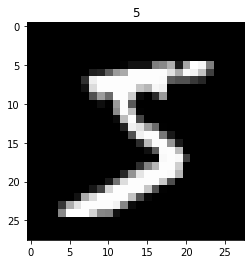

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_data = datasets.MNIST('../data', train=True, download=True)
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()


In [ ]:
model = Inception_v1_mnist(num_classes=10).to(device)
loss_function = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.282271
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.148213
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.028203
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.793338
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.725863
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.540803
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.332858
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.033765
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.035947
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.882323

Test set: Average loss: -2.5530, Accuracy: 8882/10000 (89%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.852713
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.632178
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.625812
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.545018
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.522541
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.497300
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.333806
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.527464
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.376794
